In [1]:
import pennylane as qml
from pennylane import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import cv2 as cv
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

2023-06-10 21:42:53.949121: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-10 21:42:54.125192: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-10 21:42:54.125217: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-06-10 21:42:54.880837: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

# Algorythm Artificial Bee Colony

In [2]:
import random
class BeeComplex:
    def __init__(self, num_params, R):
        self.solution = [0 for i in range(num_params)]
        self.trial = 0
        for i in range(num_params):
            theta = random.random() * 2 * np.pi
            self.solution[i] = R * random.random() * complex(np.cos(theta), np.sin(theta))

    def evaluate(self, objective_func):
        self.fitness = objective_func(np.array(self.solution))

class ABCComplex:
    def __init__(self, objective_func, num_bees, num_params, num_trials, R):
        self.objective_func = objective_func
        self.num_bees = num_bees
        self.num_params = num_params
        self.num_trials = num_trials
        self.R = R
        self.best_solution = [0 for i in range(num_params)]
        self.best_fitness = float('inf')
        self.swarm = [BeeComplex(num_params, R) for i in range(num_bees)]

    def optimize(self):
        for i in range(self.num_trials):
            for j in range(self.num_bees):
                self.swarm[j].evaluate(self.objective_func)
                if self.swarm[j].fitness < self.best_fitness:
                    self.best_solution = self.swarm[j].solution
                    self.best_fitness = self.swarm[j].fitness
            for j in range(self.num_bees):
                k = random.randint(0, self.num_bees - 1)
                while k == j:
                    k = random.randint(0, self.num_bees - 1)
                phi = random.random() * 2 - 1
                new_solution = [0 for i in range(self.num_params)]
                for m in range(self.num_params):
                    new_solution[m] = self.swarm[j].solution[m] + \
                        phi * (self.swarm[j].solution[m] - self.swarm[k].solution[m])
                    if np.abs(new_solution[m]) > self.R:
                        theta = random.random() * 2 * np.pi
                        new_solution[m] = self.R * random.random() * complex(np.cos(theta), np.sin(theta))
                new_bee = BeeComplex(self.num_params, self.R)
                new_bee.solution = new_solution
                new_bee.evaluate(self.objective_func)
                if new_bee.fitness < self.swarm[j].fitness:
                    self.swarm[j].solution = new_solution
                    self.swarm[j].fitness = new_bee.fitness
                    self.swarm[j].trial = 0
                else:
                    self.swarm[j].trial += 1
            for j in range(self.num_bees):
                if self.swarm[j].trial > self.num_trials:
                    self.swarm[j] = Bee(self.num_params, self.R)
        return self.best_solution, self.best_fitness

In [3]:
class Bee:
    def __init__(self, num_params, lower_limits, upper_limits):
        self.solution = [0 for i in range(num_params)]
        self.trial = 0
        for i in range(num_params):
            self.solution[i] = lower_limits[i] + \
                (upper_limits[i] - lower_limits[i]) * random.random()

    def evaluate(self, objective_func):
        self.fitness = objective_func(self.solution)

class ABC:
    def __init__(self, objective_func, num_bees, num_params, num_trials,
                 lower_limits, upper_limits):
        self.objective_func = objective_func
        self.num_bees = num_bees
        self.num_params = num_params
        self.num_trials = num_trials
        self.lower_limits = lower_limits
        self.upper_limits = upper_limits
        self.best_solution = [0 for i in range(num_params)]
        self.best_fitness = float('inf')
        self.swarm = [Bee(num_params, lower_limits, upper_limits)
                      for i in range(num_bees)]

    def optimize(self):
        for i in range(self.num_trials):
            for j in range(self.num_bees):
                self.swarm[j].evaluate(self.objective_func)
                if self.swarm[j].fitness < self.best_fitness:
                    self.best_solution = self.swarm[j].solution
                    self.best_fitness = self.swarm[j].fitness
            for j in range(self.num_bees):
                k = random.randint(0, self.num_bees - 1)
                while k == j:
                    k = random.randint(0, self.num_bees - 1)
                phi = random.random() * 2 - 1
                new_solution = [0 for i in range(self.num_params)]
                for m in range(self.num_params):
                    new_solution[m] = self.swarm[j].solution[m] + \
                        phi * (self.swarm[j].solution[m] - self.swarm[k].solution[m])
                    if new_solution[m] < self.lower_limits[m]:
                        new_solution[m] = self.lower_limits[m]
                    if new_solution[m] > self.upper_limits[m]:
                        new_solution[m] = self.upper_limits[m]
                new_bee = Bee(self.num_params, self.lower_limits, self.upper_limits)
                new_bee.solution = new_solution
                new_bee.evaluate(self.objective_func)
                if new_bee.fitness < self.swarm[j].fitness:
                    self.swarm[j].solution = new_solution
                    self.swarm[j].fitness = new_bee.fitness
                    self.swarm[j].trial = 0
                else:
                    self.swarm[j].trial += 1
            for j in range(self.num_bees):
                if self.swarm[j].trial > self.num_trials:
                    self.swarm[j] = Bee(self.num_params, self.lower_limits, self.upper_limits)
        return self.best_solution, self.best_fitness

# Prepared data

In [4]:
data = tf.keras.datasets.mnist.load_data(path='mnist.npz')

In [5]:
(x_train, y_train), (x_test, y_test) = data

In [6]:
print('Train')
for i in range(0, 10):
    print(f'{i} {np.sum(y_train == i)}')

Train
0 5923
1 6742
2 5958
3 6131
4 5842
5 5421
6 5918
7 6265
8 5851
9 5949


In [7]:
print('Test')
for i in range(0, 10):
    print(f'{i} {np.sum(y_test == i)}')

Test
0 980
1 1135
2 1032
3 1010
4 982
5 892
6 958
7 1028
8 974
9 1009


In [8]:
fives_train, f_train = x_train[y_train == 5], y_train[y_train == 5]
five_train_index = np.random.choice(fives_train.shape[0], 500)
fives_train = fives_train[five_train_index]
f_train = f_train[five_train_index]

fives_test, f_test = x_test[y_test == 5], y_test[y_test == 5]
five_test_index = np.random.choice(fives_test.shape[0], 250)
fives_test = fives_test[five_test_index]
f_test = f_test[five_test_index]

In [9]:
ones_train, o_train = x_train[y_train == 1], y_train[y_train == 1]
ones_train_index = np.random.choice(ones_train.shape[0], 500)
ones_train = ones_train[ones_train_index]
o_train = o_train[ones_train_index]

ones_test, o_test = x_test[y_test == 1], y_test[y_test == 1]
ones_test_index = np.random.choice(ones_test.shape[0], 250)
ones_test = ones_test[ones_test_index]
o_test = o_test[ones_test_index]

In [10]:
two_train, tw_train = x_train[y_train == 2], y_train[y_train == 2]
two_train_index = np.random.choice(two_train.shape[0], 500)
two_train = two_train[two_train_index]
tw_train = tw_train[two_train_index]

two_test, tw_test = x_test[y_test == 2], y_test[y_test == 2]
two_test_index = np.random.choice(two_test.shape[0], 250)
two_test = two_test[two_test_index]
tw_test = tw_test[two_test_index]

In [11]:
zero_train, ze_train = x_train[y_train == 0], y_train[y_train == 0]
zero_train_index = np.random.choice(zero_train.shape[0], 500)
zero_train = zero_train[zero_train_index]
ze_train = ze_train[zero_train_index]

zero_test, ze_test = x_test[y_test == 0], y_test[y_test == 0]
zero_test_index = np.random.choice(zero_test.shape[0], 250)
zero_test = zero_test[zero_test_index]
ze_test = ze_test[zero_test_index]

In [12]:
train, test = np.vstack((fives_train, ones_train)), np.vstack((fives_test, ones_test))
target_train, target_test = np.hstack((f_train, o_train)), np.hstack((f_test, o_test))

In [13]:
set_train, t_train = shuffle(train, target_train, random_state=0)
set_test, t_test = shuffle(test, target_test, random_state=0)

In [14]:
t_train = t_train.astype(np.int64)
t_test = t_test.astype(np.int64)

In [15]:
target_train_categorical = np.zeros((t_train.shape[0], 2))
target_test_categorical = np.zeros((t_test.shape[0], 2))

In [16]:
target_train_categorical[t_train == 1] = [1, 0]
target_train_categorical[t_train == 5] = [0, 1]

target_test_categorical[t_test == 1] = [1, 0]
target_test_categorical[t_test == 5] = [0, 1]

In [17]:
train_norm = []
for img in set_train:
    img_resize = cv.resize(img, (16, 16), interpolation=cv.INTER_LINEAR)
    img_norm = cv.normalize(img_resize, None, alpha=0,beta=1, norm_type=cv.NORM_MINMAX)
    train_norm.append(img_norm)
train_norm = np.array(train_norm)

In [18]:
test_norm = []
for img in set_test:
    img_resize = cv.resize(img, (16, 16), interpolation=cv.INTER_LINEAR)
    img_norm = cv.normalize(img_resize, None, alpha=0,beta=1, norm_type=cv.NORM_MINMAX)
    test_norm.append(img_norm)
test_norm = np.array(test_norm)

In [19]:
train_img_vector = train_norm.reshape((-1, 256))
test_img_vector = test_norm.reshape((-1, 256))

In [20]:
train_norm_8 = []
for img in set_train:
    img_resize = cv.resize(img, (8, 8), interpolation=cv.INTER_LINEAR)
    img_norm = cv.normalize(img_resize, None, alpha=0,beta=1, norm_type=cv.NORM_MINMAX)
    train_norm_8.append(img_norm)
train_norm_8 = np.array(train_norm_8).astype(np.float64)

In [21]:
test_norm_8 = []
for img in set_test:
    img_resize = cv.resize(img, (8, 8), interpolation=cv.INTER_LINEAR)
    img_norm = cv.normalize(img_resize, None, alpha=0,beta=1, norm_type=cv.NORM_MINMAX)
    test_norm_8.append(img_norm)
test_norm_8 = np.array(test_norm_8).astype(np.float64)

In [22]:
train_img_vector_8 = train_norm_8.reshape((-1, 64))
test_img_vector_8 = test_norm_8.reshape((-1, 64))

# Quantum Neuron Network

In [23]:
QUBITS = range(8)
dev_qnn = qml.device('default.qubit', wires=QUBITS)

In [24]:
def amplitude_embedding(features, quants):
    qml.AmplitudeEmbedding(features=features, wires=quants, normalize=True)

In [25]:
def q_conv_circuit_1(theta, quants):
    qml.RY(theta[0], wires=quants[0])
    qml.RY(theta[1], wires=quants[1])
    qml.CNOT(wires=quants)

In [26]:
def q_conv_circuit_2(theta, quants):
    qml.Hadamard(wires=quants[0])
    qml.Hadamard(wires=quants[0])
    qml.CZ(wires=quants)
    qml.CRX(theta[0], wires=quants[0])
    qml.CRX(theta[1], wires=quants[1])

In [27]:
def q_conv_circuit_3(theta, quants):
    qml.RY(theta[0], wires=quants[0])
    qml.RY(theta[1], wires=quants[1])
    qml.CNOT(wires=(quants[1], quants[0]))
    qml.RY(theta[2], wires=quants[0])
    qml.RY(theta[3], wires=quants[1])
    qml.CNOT(wires=quants)

In [28]:
def q_conv_circuit_4(theta, quants):
    qml.RY(theta[0], wires=quants[0])
    qml.RY(theta[1], wires=quants[1])
    qml.CNOT(wires=quants)
    qml.CNOT(wires=[quants[1], quants[0]])

In [29]:
def q_conv_circuit_5(theta, quants):
    qml.RY(theta[0], wires=quants[0])
    qml.RY(theta[1], wires=quants[1])
    qml.RY(theta[2], wires=quants[2])
    qml.Toffoli(wires=quants)
    qml.Toffoli(wires=[quants[0], quants[2], quants[1]])
    qml.Toffoli(wires=[quants[2], quants[1], quants[0]])

In [30]:
def q_conv_circuit_6(theta, quants):
    qml.SpecialUnitary([theta[0], theta[1], theta[2]], wires=quants[0])
    qml.SpecialUnitary([theta[3], theta[4], theta[5]], wires=quants[1])
    qml.CNOT(wires=quants)
    qml.CNOT(wires=[quants[1], quants[0]])

In [31]:
def q_conv_circuit_7(theta, quants):
    qml.SpecialUnitary([theta[0], theta[1], theta[2]], wires=quants[0])
    qml.SpecialUnitary([theta[3], theta[4], theta[5]], wires=quants[1])
    qml.SpecialUnitary([theta[6], theta[7], theta[8]], wires=quants[2])
    qml.Toffoli(wires=quants)
    qml.Toffoli(wires=[quants[0], quants[2], quants[1]])
    qml.Toffoli(wires=[quants[2], quants[1], quants[0]])

In [32]:
def q_conv_circuit_8(theta, quants):
    qml.SpecialUnitary([theta[0], theta[1], theta[2]], wires=quants[0])
    qml.SpecialUnitary([theta[3], theta[4], theta[5]], wires=quants[1])
    qml.CNOT(wires=(quants[1], quants[0]))
    qml.SpecialUnitary([theta[6], theta[7], theta[8]], wires=quants[0])
    qml.SpecialUnitary([theta[9], theta[10], theta[11]], wires=quants[1])
    qml.CNOT(wires=quants)

In [33]:
def q_pool_circuit(theta, quants):
    qml.CRZ(theta[0], wires=quants)
    qml.PauliX(wires=quants[0])
    qml.CRX(theta[1], wires=quants)

In [34]:
def cos_complex(theta):
    return complex(np.cos(theta.real)*np.cosh(theta.imag), -np.sin(theta.real) * np.sinh(theta.imag))

In [35]:
def sin_complex(theta):
    return complex(np.sin(theta.real)*np.cosh(theta.imag), np.cos(theta.real) * np.sinh(theta.imag))

In [36]:
def cosh_complex(theta):
    return complex(np.cos(theta.imag)*np.cosh(theta.real), np.sin(theta.imag) * np.sinh(theta.real))

In [37]:
def sinh_complex(theta):
    return complex(np.cos(theta.imag)*np.sinh(theta.real), np.sin(theta.imag) * np.cosh(theta.real))

In [38]:
def unitary_matrix_hyperbolic(theta):
    cosh = complex(cosh_complex(theta), -sinh_complex(theta))
    sinh = complex(-sinh_complex(theta), -cosh_complex(theta))
    d = np.sqrt(np.power(np.abs(cosh), 2) + np.power(np.abs(sinh), 2))
    U = (1/d) * np.array([[cosh, sinh],
                  [sinh, cosh]])
    return U

In [39]:
def unitary_matrix_harmonic(theta):
    cos = complex(cos_complex(theta), -sin_complex(theta))
    sin = complex(-sin_complex(theta), -cos_complex(theta))
    d = np.sqrt(np.power(np.abs(cos), 2) + np.power(np.abs(sin), 2))
    U = (1/d) * np.array([[cos, sin],
                  [sin, cos]])
    return U

In [40]:
def q_conv_circuit_complex_1(theta, quants):
    qml.QubitUnitary(unitary_matrix_harmonic(theta[0]), wires=quants[0])
    qml.QubitUnitary(unitary_matrix_harmonic(theta[1]), wires=quants[1])
    qml.CNOT(wires=quants)
    qml.CNOT(wires=[quants[1], quants[0]])

In [41]:
def q_conv_circuit_complex_2(theta, quants):
    qml.QubitUnitary(unitary_matrix_hyperbolic(theta[0]), wires=quants[0])
    qml.QubitUnitary(unitary_matrix_hyperbolic(theta[1]), wires=quants[1])
    qml.CNOT(wires=quants)

In [42]:
def q_pool_circuit_complex(theta, quants):
    qml.ControlledQubitUnitary(unitary_matrix_hyperbolic(theta[0]), control_wires=quants[0], wires=quants[1])
    qml.PauliX(wires=quants[0])
    qml.ControlledQubitUnitary(unitary_matrix_hyperbolic(theta[1]), control_wires=quants[0], wires=quants[1])

In [43]:
dev = qml.device('default.qubit', wires=8)
dev_qbm = qml.device('qiskit.aer', wires=8)

In [44]:
@qml.qnode(dev)
def qcnn(img, theta):
    qubits = QUBITS
    amplitude_embedding(img, qubits)
    theta_i = 0
    # 1 layer
    for q_i, q_j in zip(range(0, 8, 2), range(1, 8, 2)):
        q_conv_circuit_4(theta[theta_i:theta_i + 2], (q_i, q_j))
        theta_i += 2
    for q_i, q_j in zip(range(1, 8, 2), range(2, 9, 2)):
        q_conv_circuit_4(theta[theta_i:theta_i + 2], (q_i, q_j % 8))
        theta_i += 2
    for q_i, q_j in zip(range(0, 8, 2), range(1, 8, 2)):
        q_pool_circuit(theta[theta_i:theta_i + 2], (q_i, q_j))
        theta_i += 2
    # 2 layer
    for q_i, q_j in zip(range(1, 8, 4), range(3, 8, 4)):
        q_conv_circuit_4(theta[theta_i:theta_i + 2], (q_i, q_j))
        theta_i += 2
    for q_i, q_j in zip(range(3, 8, 4), range(5, 10, 4)):
        q_conv_circuit_4(theta[theta_i:theta_i + 2], (q_i, q_j % 8))
        theta_i += 2
    for q_i, q_j in zip(range(1, 8, 4), range(3, 8, 4)):
        q_pool_circuit(theta[theta_i:theta_i + 2], (q_i, q_j))
        theta_i += 2
    # 3 layer
    q_conv_circuit_4(theta[theta_i:theta_i + 2], (3, 7))
    theta_i += 2
    q_pool_circuit(theta[theta_i:theta_i + 2], (3, 7))

    return qml.probs(wires=7)

In [45]:
dev = qml.device('default.qubit', wires=6)

In [46]:
@qml.qnode(dev)
def qcnn_1(img, theta):
    qubits = range(6)
    amplitude_embedding(img, qubits)
    theta_i = 0
    q_conv_circuit_5(theta[:3], [0,1,2])
    q_conv_circuit_5(theta[3:6], [3,4,5])
    q_conv_circuit_5(theta[6:9], [0,1,2])
    q_conv_circuit_5(theta[9:12], [3,4,5])

    q_conv_circuit_4(theta[12:14], [2,5])
    q_conv_circuit_3(theta[14:18], [2,5])

    q_pool_circuit(theta[18:20], [2,5])
    return qml.probs(wires=5)

In [47]:
theta = np.zeros((40, ))

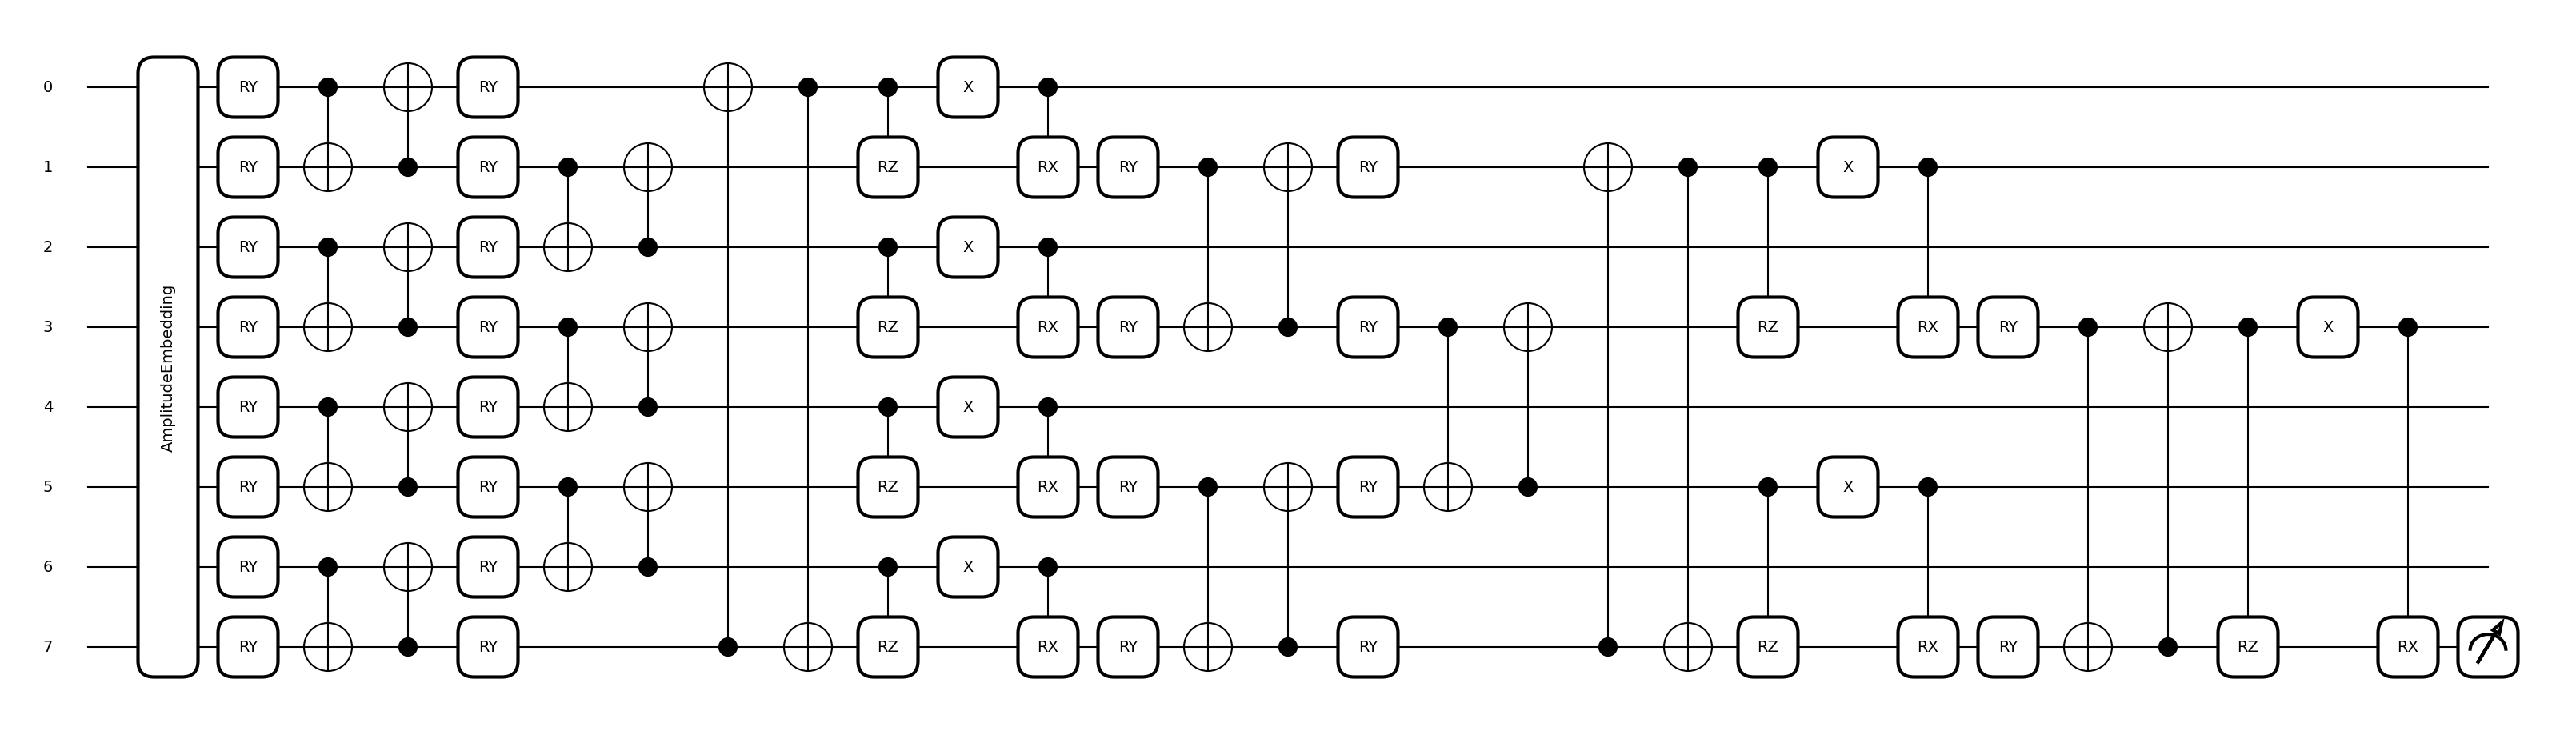

In [48]:
fig, ax = qml.draw_mpl(qcnn)(train_img_vector[0], theta)
plt.show()

In [49]:
@qml.qnode(dev)
def qcnn_new(img, theta):
    qubits = range(6)
    amplitude_embedding(img, qubits)
    theta_i = 0
    q_conv_circuit_3(theta[:4], [0,1])
    q_conv_circuit_3(theta[4:8], [2, 3])
    q_conv_circuit_3(theta[8:12], [4, 5])

    q_conv_circuit_4(theta[12:14], [2,5])
    q_conv_circuit_3(theta[14:18], [2,5])

    q_pool_circuit(theta[18:20], [2,5])
    return qml.probs(wires=5)

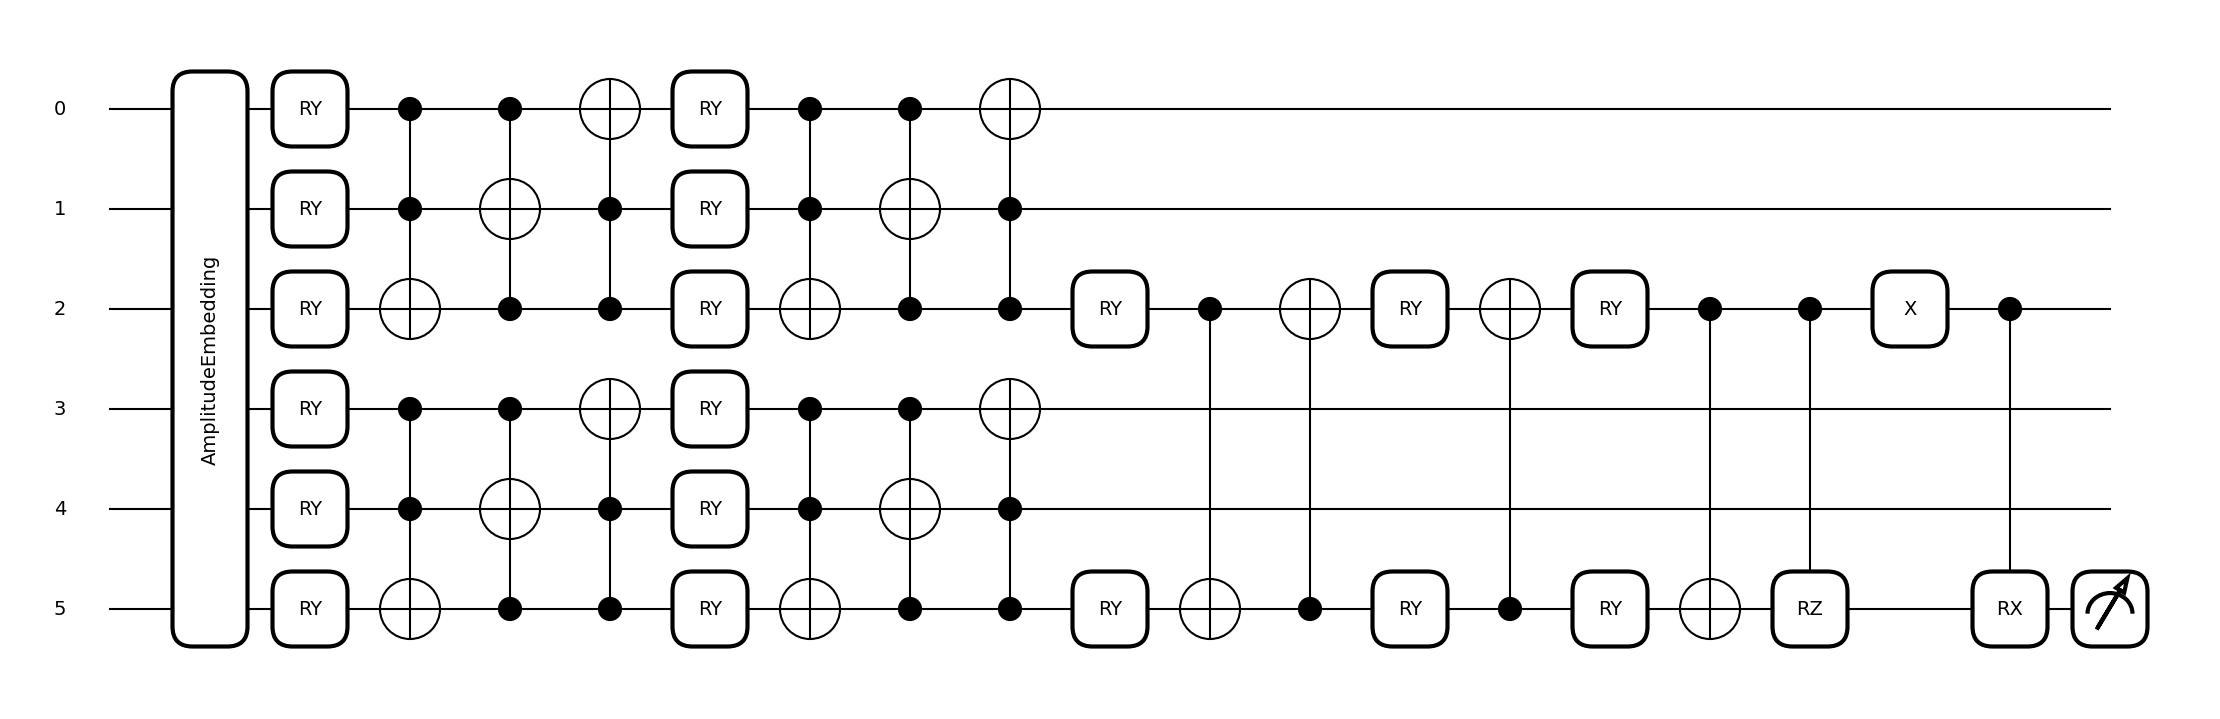

In [50]:
theta = np.array([complex(1,1)]*40)
fig, ax = qml.draw_mpl(qcnn_1)(train_img_vector[0][:64], theta)
plt.show()

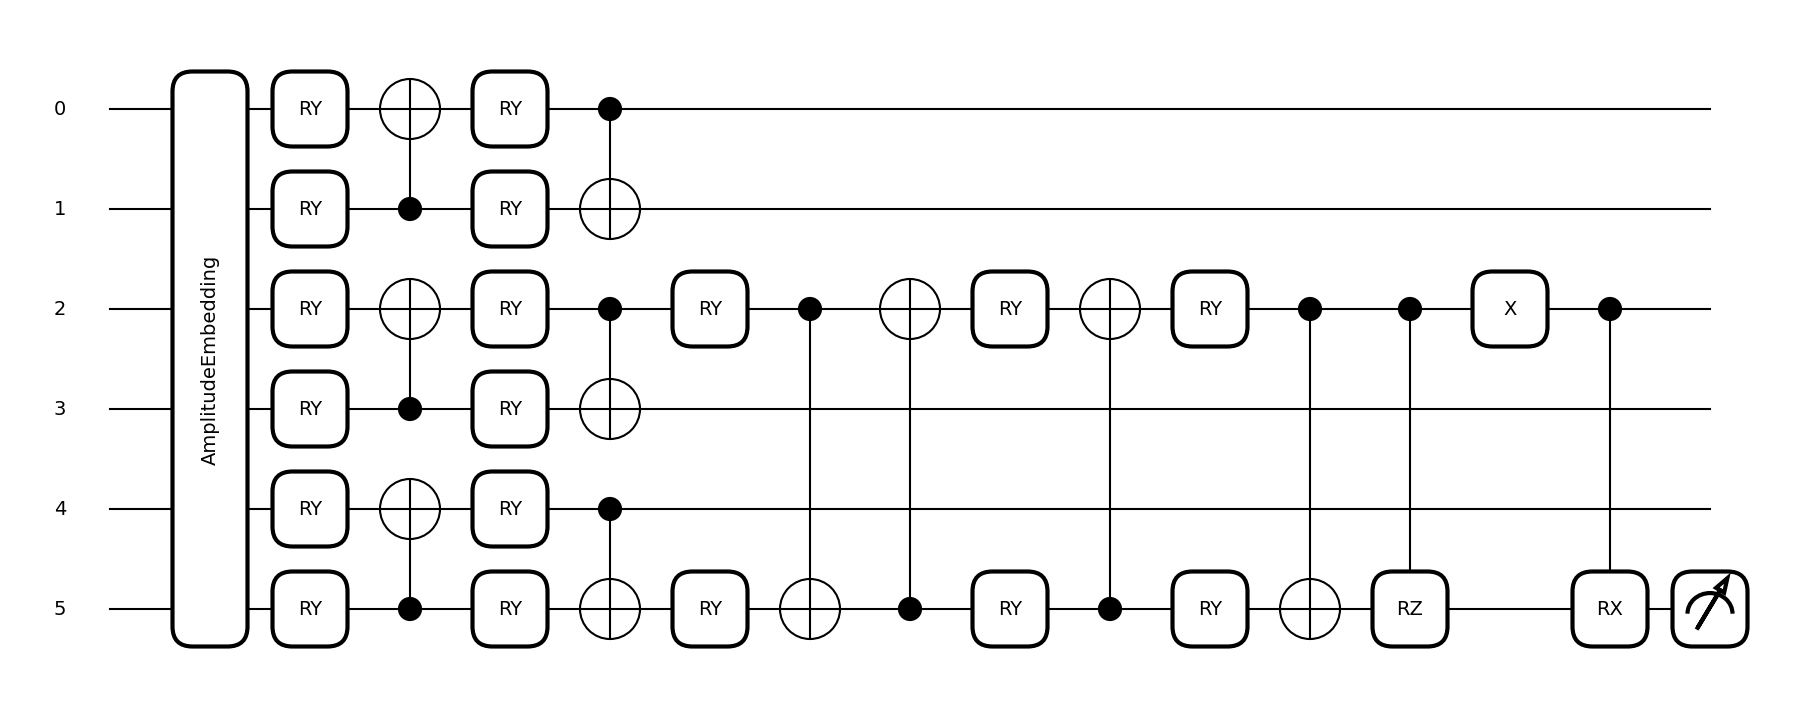

In [51]:
theta = np.array([complex(1,1)]*20)
fig, ax = qml.draw_mpl(qcnn_new)(train_img_vector[0][:64], theta)
plt.show()

In [74]:
print('Hello')

Hello


In [175]:
def cost(theta):
    epsilon = 1e-15
    prediction = np.array([qcnn(img, theta) for img in train_img_vector])
    return -np.sum(target_train_categorical * np.log(prediction + epsilon))

In [176]:
def cost_test(theta):
    epsilon = 1e-15
    prediction = np.array([qcnn(img, theta) for img in test_img_vector])
    return -np.sum(target_test_categorical * np.log(prediction + epsilon))

# Classical number (theta)

In [102]:
abc = ABC(cost, 30, 40, 10, [-2]*40, [2]*40)

In [103]:
%%time
abc.optimize()

CPU times: user 4h 19min 28s, sys: 3.33 s, total: 4h 19min 31s
Wall time: 4h 20min 57s


([0.6286588890480288,
  -0.22198166482044682,
  -1.186696461156338,
  0.39981729250453696,
  -0.6748042781652993,
  -1.9191866915390103,
  0.6837424854259982,
  -1.0486658593792573,
  -1.9078035538603186,
  0.2037050874763353,
  -0.2870353322302117,
  -0.00025839425683443773,
  0.20358396951735042,
  0.8734087741949762,
  -0.36522814175395163,
  -1.9981943104354167,
  -1.3082097386036011,
  -1.8212860644734241,
  -0.7451148671805274,
  -0.5680410652884647,
  0.3600179187192579,
  -0.26901859212128054,
  -0.9173369118942977,
  -0.29341143916416723,
  -1.7539264885218657,
  -0.3144132555629395,
  -1.058818086674966,
  1.0438305347868004,
  0.6702439872599957,
  1.7566368950240312,
  1.1878536406454026,
  -1.4419681532224171,
  -1.4919419795898679,
  -0.7036387465457387,
  -0.8715463616365648,
  -0.40107483409318456,
  0.1776195751909117,
  0.7159584963936904,
  0.4284646070114251,
  -1.9865253095109352],
 tensor(617.545114, requires_grad=True))

In [104]:
abc.best_solution

[0.6286588890480288,
 -0.22198166482044682,
 -1.186696461156338,
 0.39981729250453696,
 -0.6748042781652993,
 -1.9191866915390103,
 0.6837424854259982,
 -1.0486658593792573,
 -1.9078035538603186,
 0.2037050874763353,
 -0.2870353322302117,
 -0.00025839425683443773,
 0.20358396951735042,
 0.8734087741949762,
 -0.36522814175395163,
 -1.9981943104354167,
 -1.3082097386036011,
 -1.8212860644734241,
 -0.7451148671805274,
 -0.5680410652884647,
 0.3600179187192579,
 -0.26901859212128054,
 -0.9173369118942977,
 -0.29341143916416723,
 -1.7539264885218657,
 -0.3144132555629395,
 -1.058818086674966,
 1.0438305347868004,
 0.6702439872599957,
 1.7566368950240312,
 1.1878536406454026,
 -1.4419681532224171,
 -1.4919419795898679,
 -0.7036387465457387,
 -0.8715463616365648,
 -0.40107483409318456,
 0.1776195751909117,
 0.7159584963936904,
 0.4284646070114251,
 -1.9865253095109352]

In [107]:
abc.best_fitness

tensor(617.545114, requires_grad=True)

In [108]:
cost_test(abc.best_solution)

tensor(306.14050246, requires_grad=True)

In [111]:
y_pred = []
for i in test_img_vector:
    prediction = np.argmax(qcnn(i, abc.best_solution))
    y_pred.append(1 if prediction == 0 else 5)
y_pred = np.array(y_pred)

In [62]:
def print_result(y_target, y_predict):
    print(f'Accuracy: {accuracy_score(y_target, y_predict)}')
    print(f'Recall: {recall_score(y_target, y_predict)}')
    print(f'Precision: {precision_score(y_target, y_predict)}')
    print(f'F1-score: {f1_score(y_target, y_predict)}')

In [113]:
print_result(t_test, y_pred)

Accuracy: 0.73
Recall: 0.824
Precision: 0.6936026936026936
F1-score: 0.7531992687385739


In [114]:
np.save('./models/simple_qcnn_with_qconv1_cross_entropy.npy', abc.best_solution)

## 2

In [177]:
abc = ABC(cost, 30, 40, 10, [-2]*40, [2]*40)

In [179]:
%%time
cost([0]*40)

CPU times: user 34.2 s, sys: 17.5 ms, total: 34.2 s
Wall time: 34.6 s


tensor(904.9290862, requires_grad=True)

In [180]:
%%time
abc.optimize()

CPU times: user 4h 25min 26s, sys: 4.15 s, total: 4h 25min 30s
Wall time: 4h 27min 3s


([-1.6072066403293628,
  -0.07548134338284038,
  1.5824589355648606,
  1.7397207285660685,
  -0.13868506286688606,
  0.1268529093435258,
  1.6763395286831615,
  0.8100505975837543,
  -0.8067095940942918,
  -0.7276080278086329,
  1.6275171373105297,
  -1.0319626373452082,
  1.8707035775854335,
  0.0905676090898929,
  0.07352437487357014,
  0.8627636428108505,
  1.1787356200022312,
  1.5818246898808566,
  1.629197525719126,
  1.639481770414679,
  1.821476542736399,
  -0.26010808443401934,
  1.620295970525683,
  -1.5758467808141474,
  -0.28805243290107174,
  -1.6340838092644858,
  0.8593098165354716,
  1.681804169402882,
  1.7264552523621184,
  1.082687452019578,
  -0.5598114342368642,
  -0.6995050161677898,
  0.9347510840583685,
  -1.6263314273590894,
  1.2192165088199993,
  1.1599391554889467,
  0.7442978546336195,
  -0.2531812123569833,
  -1.2572994357291472,
  1.6573338674914377],
 tensor(630.69255619, requires_grad=True))

In [181]:
abc.best_fitness

tensor(630.69255619, requires_grad=True)

In [183]:
y_pred = []
for i in test_img_vector:
    prediction = np.argmax(qcnn(i, abc.best_solution))
    y_pred.append(1 if prediction == 0 else 5)
y_pred = np.array(y_pred)

In [185]:
print_result(t_test, y_pred)

Accuracy: 0.832
Recall: 0.764
Precision: 0.8842592592592593
F1-score: 0.8197424892703863


## 3

In [35]:
def cost(theta):
    epsilon = 1e-15
    prediction = np.array([qcnn_1(img, theta) for img in train_img_vector_8])
    return -np.sum(target_train_categorical * np.log(prediction + epsilon))

In [52]:
def cost(theta):
    epsilon = 1e-15
    prediction = np.array([qcnn_new(img, theta) for img in train_img_vector_8])
    return -np.sum(target_train_categorical * np.log(prediction + epsilon))

In [36]:
def cost_test(theta):
    epsilon = 1e-15
    prediction = np.array([qcnn_new(img, theta) for img in test_img_vector_8])
    return -np.sum(target_test_categorical * np.log(prediction + epsilon))

In [54]:
abc = ABC(cost, 30, 20, 10, [-2]*20, [2]*20)

In [55]:
%%time
cost([0]*20)

CPU times: user 14.1 s, sys: 16.4 ms, total: 14.1 s
Wall time: 14.2 s


tensor(581.0030751, requires_grad=True)

In [56]:
%%time
abc.optimize()

CPU times: user 2h 19min 1s, sys: 3.99 s, total: 2h 19min 5s
Wall time: 2h 20min 8s


([-1.1916675143143463,
  1.2138072035812335,
  -1.0559863080724003,
  0.4657478318474588,
  -0.7458461840493658,
  -0.6794799106322378,
  0.18918562737756878,
  -0.8440162356281804,
  -1.1983429606274552,
  1.363068440092111,
  0.6321883228078943,
  -0.6695543215811992,
  -0.2823693769479627,
  1.326973513634162,
  -0.004913397314446177,
  0.1666600887499451,
  0.19162427955429573,
  0.7996221234219961,
  -1.3144681987043356,
  -0.786991500082534],
 tensor(497.29795551, requires_grad=True))

In [57]:
abc.best_fitness

tensor(497.29795551, requires_grad=True)

In [63]:
cost_test(abc.best_solution)

NameError: name 'cost_test' is not defined

In [64]:
y_pred = []
for i in test_img_vector_8:
    prediction = np.argmax(qcnn_new(i, abc.best_solution))
    y_pred.append(1 if prediction == 0 else 5)
y_pred = np.array(y_pred)

In [65]:
print_result(t_test, y_pred)

Accuracy: 0.836
Recall: 0.86
Precision: 0.8206106870229007
F1-score: 0.83984375


In [66]:
y_pred = []
for i in train_img_vector_8:
    prediction = np.argmax(qcnn_new(i, abc.best_solution))
    y_pred.append(1 if prediction == 0 else 5)
y_pred = np.array(y_pred)

In [67]:
print_result(t_train, y_pred)

Accuracy: 0.835
Recall: 0.888
Precision: 0.8028933092224232
F1-score: 0.8433048433048433


In [298]:
np.save('./models/simple_qcnn_with_qconv4_qconv5_qconv3_cross_entropy.npy', abc.best_solution)

# Multilabling

In [37]:
train_4, test_4 = np.vstack((fives_train, ones_train, two_train, zero_train)), np.vstack((fives_test, ones_test, two_test, zero_test))
target_train_4, target_test_4 = np.hstack((f_train, o_train, tw_train, ze_train)), np.hstack((f_test, o_test, tw_test, ze_test))

In [38]:
set_train_4, t_train_4 = shuffle(train_4, target_train_4, random_state=0)
set_test_4, t_test_4 = shuffle(test_4, target_test_4, random_state=0)

In [39]:
t_train_4 = t_train_4.astype(np.int64)
t_test_4 = t_test_4.astype(np.int64)

In [40]:
target_train_categorical_4 = np.zeros((t_train_4.shape[0], 4))
target_test_categorical_4 = np.zeros((t_test_4.shape[0], 4))
target_train_categorical_4[t_train_4 == 1] = [1, 0, 0, 0]
target_train_categorical_4[t_train_4 == 5] = [0, 1, 0, 0]
target_train_categorical_4[t_train_4 == 2] = [0, 0, 1, 0]
target_train_categorical_4[t_train_4 == 0] = [0, 0, 0, 1]

target_test_categorical_4[t_test_4 == 1] = [1, 0, 0, 0]
target_test_categorical_4[t_test_4 == 5] = [0, 1, 0, 0]
target_test_categorical_4[t_test_4 == 2] = [0, 0, 1, 0]
target_test_categorical_4[t_test_4 == 0] = [0, 0, 0, 1]

In [47]:
t_train_4

tensor([5, 2, 2, ..., 0, 1, 1], requires_grad=True)

In [41]:
set_train_4.shape

(2000, 28, 28)

In [42]:
train_norm_4_8 = []
for img in set_train_4:
    img_resize = cv.resize(img, (8, 8), interpolation=cv.INTER_LINEAR)
    img_norm = cv.normalize(img_resize, None, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)
    train_norm_4_8.append(img_norm)
train_norm_4_8 = np.array(train_norm_4_8).astype(np.float64)

In [43]:
test_norm_4_8 = []
for img in set_test_4:
    img_resize = cv.resize(img, (8, 8), interpolation=cv.INTER_LINEAR)
    img_norm = cv.normalize(img_resize, None, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)
    test_norm_4_8.append(img_norm)
test_norm_4_8 = np.array(test_norm_4_8).astype(np.float64)

In [44]:
train_img_vector_4_8 = train_norm_4_8.reshape((-1, 64))
test_img_vector_4_8 = test_norm_4_8.reshape((-1, 64))

In [50]:
@qml.qnode(dev)
def qcnn_2(img, theta):
    qubits = range(6)
    amplitude_embedding(img, qubits)
    theta_i = 0
    q_conv_circuit_7(theta[:9], [0,1,2])
    q_conv_circuit_7(theta[9:18], [3,4,5])
    q_conv_circuit_7(theta[18:27], [0,1,2])
    q_conv_circuit_7(theta[27:36], [3,4,5])

    q_conv_circuit_6(theta[36:42], [2,5])
    q_conv_circuit_8(theta[42:54], [2,5])

    # q_conv_circuit_3(theta[20:24], [2,5])

    return qml.probs(wires=[2,5])

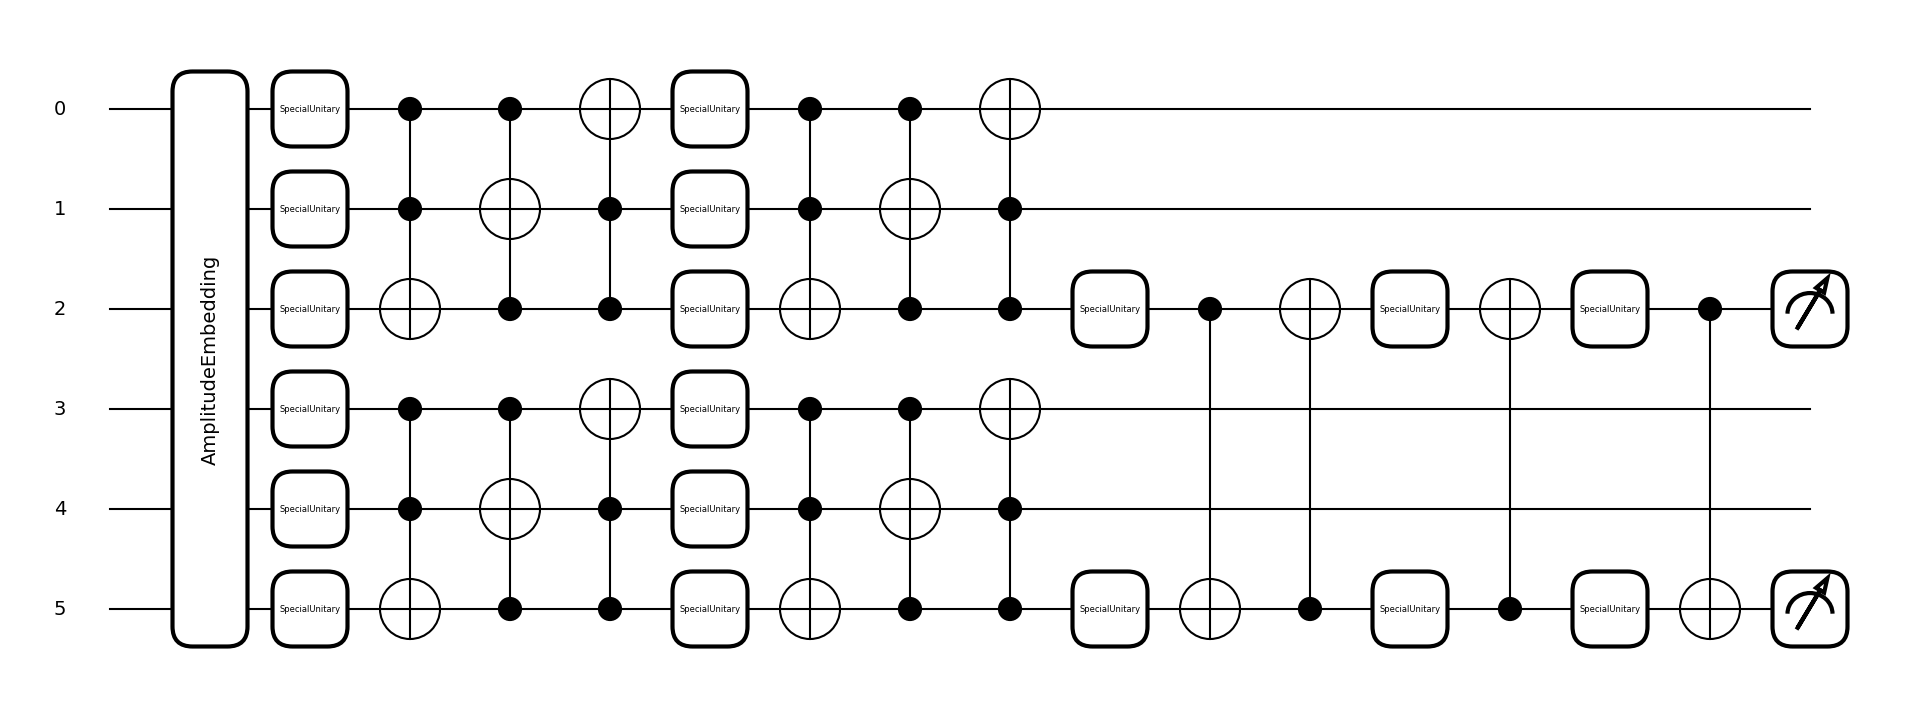

In [383]:
theta = np.array([complex(1,1)]*54)
fig, ax = qml.draw_mpl(qcnn_2)(train_img_vector_4_8[0], theta)
plt.show()

In [384]:
def cost(theta):
    epsilon = 1e-15
    prediction = np.array([qcnn_2(img, theta) for img in train_img_vector_4_8])
    return -np.sum(target_train_categorical_4 * np.log(prediction + epsilon))

In [385]:
def cost_test(theta):
    epsilon = 1e-15
    prediction = np.array([qcnn_2(img, theta) for img in test_img_vector_4_8])
    return -np.sum(target_test_categorical_4 * np.log(prediction + epsilon))

In [386]:
%%time
cost([0]*54)

CPU times: user 36.9 s, sys: 5.95 ms, total: 36.9 s
Wall time: 37.3 s


tensor(9505.39862453, requires_grad=True)

# Training

In [396]:
abc_multi = ABC(cost, 45, 54, 15, [-5]*54, [5]*54)

In [397]:
%%time
abc_multi.optimize()

CPU times: user 15h 53min 30s, sys: 25.6 s, total: 15h 53min 56s
Wall time: 16h 1min 35s


([1.917362437572642,
  -3.509132561338163,
  0.3918723712678313,
  -2.433123058185853,
  -0.12971342175144793,
  -2.406815859862604,
  2.024289083551857,
  2.5423991254389873,
  2.809247482134232,
  1.751617551229394,
  -1.9669046213004626,
  -1.186023598510968,
  3.0125125386302183,
  -1.0575928523258038,
  -1.3084076201431207,
  -1.0220580709205862,
  0.4673759518860272,
  -1.8374866994076482,
  1.593849703128085,
  -0.6015945696471219,
  2.256513631546174,
  1.745781564383481,
  -1.2960397208016743,
  1.1838619685864717,
  -0.9202183498388254,
  -1.534776900055311,
  -2.7676316339244167,
  -0.4793390094738395,
  -0.970852662238095,
  0.1608710125086293,
  0.5148136309551656,
  -1.9855522851211362,
  1.6279653603127422,
  -3.3521164096581515,
  -2.0315481273712788,
  1.7545903740282252,
  -1.7678570011743064,
  -0.6462712843382633,
  0.6718908628103166,
  1.8189336066498338,
  -2.696932185474942,
  -3.3504191111410524,
  0.8840592120119611,
  -1.5594997504826147,
  -0.449393823388208

In [48]:
theta = [1.917362437572642,
  -3.509132561338163,
  0.3918723712678313,
  -2.433123058185853,
  -0.12971342175144793,
  -2.406815859862604,
  2.024289083551857,
  2.5423991254389873,
  2.809247482134232,
  1.751617551229394,
  -1.9669046213004626,
  -1.186023598510968,
  3.0125125386302183,
  -1.0575928523258038,
  -1.3084076201431207,
  -1.0220580709205862,
  0.4673759518860272,
  -1.8374866994076482,
  1.593849703128085,
  -0.6015945696471219,
  2.256513631546174,
  1.745781564383481,
  -1.2960397208016743,
  1.1838619685864717,
  -0.9202183498388254,
  -1.534776900055311,
  -2.7676316339244167,
  -0.4793390094738395,
  -0.970852662238095,
  0.1608710125086293,
  0.5148136309551656,
  -1.9855522851211362,
  1.6279653603127422,
  -3.3521164096581515,
  -2.0315481273712788,
  1.7545903740282252,
  -1.7678570011743064,
  -0.6462712843382633,
  0.6718908628103166,
  1.8189336066498338,
  -2.696932185474942,
  -3.3504191111410524,
  0.8840592120119611,
  -1.5594997504826147,
  -0.4493938233882082,
  -0.6227912119550283,
  3.142609058403656,
  0.24326018532385688,
  0.3797983997333519,
  2.5866877676446145,
  -2.926343935408732,
  2.381241490681631,
  -0.35450115882805505,
  -2.812702154061232]

In [398]:
abc_multi.best_fitness

tensor(2551.30331537, requires_grad=True)

In [ ]:
target_train_categorical_4[t_train_4 == 1] = [1, 0, 0, 0]
target_train_categorical_4[t_train_4 == 5] = [0, 1, 0, 0]
target_train_categorical_4[t_train_4 == 2] = [0, 0, 1, 0]
target_train_categorical_4[t_train_4 == 0] = [0, 0, 0, 1]

In [57]:
y_pred = []
for i in test_img_vector_4_8:
    prediction = np.argmax(qcnn_2(i, theta))
    if (prediction == 0):
        y_pred.append(1)
    elif (prediction == 1):
        y_pred.append(5)
    elif (prediction == 2):
        y_pred.append(2)
    elif (prediction == 3):
        y_pred.append(0)
y_pred = np.array(y_pred)

In [58]:
t_test_4.shape

(1000,)

In [59]:
test_img_vector_8.shape

(500, 64)

In [62]:
confusion_matrix(t_test_4, y_pred)

array([[176,  29,  18,  27],
       [  3, 220,  10,  17],
       [111,  31,  42,  66],
       [ 76,  99,  55,  20]])

# Complex number (theta)

In [196]:
U = qml.SpecialUnitary([complex(1, 1)]*3, wires=[0]).matrix()
np.dot(U, np.conj(U.T))

tensor([[ 6.77603943+0.j        , -9.21348388+9.21348388j],
        [-9.21348388-9.21348388j, 25.20300719+0.j        ]], requires_grad=True)

In [188]:
def cost_complex(theta):
    epsilon = 1e-15
    prediction = np.array([qcnn_complex(img, theta) for img in train_img_vector])
    return -np.sum(target_train_categorical * np.log(prediction + epsilon))

In [189]:
def cost_test_complex(theta):
    epsilon = 1e-15
    prediction = np.array([qcnn_complex(img, theta) for img in test_img_vector])
    return -np.sum(target_test_categorical * np.log(prediction + epsilon))

In [190]:
theta = np.array([complex(0.9,0.5)] * 40)

In [193]:
qcnn_complex(test_img_vector[0], theta)

tensor([0.5, 0.5], requires_grad=True)

In [165]:
%%time
cost_complex(theta)

CPU times: user 41.2 s, sys: 44.3 ms, total: 41.3 s
Wall time: 41.7 s


tensor(735.63606786, requires_grad=True)

In [126]:
theta = np.array([(-1.387428911422807-0.9009618821156646j),
  (-1.1369441217480583-1.2338221664486582j),
  (-1.60094403122035-0.9042765567863221j),
  (1.4121979431379925-1.1382987124222512j),
  (-1.1968009562452866+1.1689961182859125j),
  (1.484659615012005+0.9615988685234529j),
  (-0.4139703608056396-0.3304149824759437j),
  (-1.6354814814644243+1.015872387385746j),
  (0.9590986515385748+1.4761555985215664j),
  (0.3111184847481693-0.42666490643886107j),
  (-0.9839406630712143-0.37186694054065594j),
  (-0.17073118773839097-0.28980891407199005j),
  (0.007897230164874813+1.9939125312052766j),
  (0.7620480180953395-1.3508122043310613j),
  (0.634742376265832+0.4521767697873584j),
  (-0.03912268229715109+1.7052349338847064j),
  (-1.906533739229598+0.5197235633655097j),
  (0.1742108625712289-1.129063421658989j),
  (0.06525820629347895+1.0013362214311505j),
  (0.12204389446670057+0.6308606107318806j),
  (0.21072893908575918-1.6793282839668398j),
  (0.758486883984883-0.5472356397944986j),
  (-0.20829734029791697+0.0060685631254338915j),
  (-0.9557084761359751-0.20211784830076218j),
  (0.43852615038580817+0.7665652429017609j),
  (0.18165616151806172-1.083379699593645j),
  (-0.8504254526499451+1.6194853190749527j),
  (-0.08326982989957982+0.4907755640836269j),
  (-0.23365859758730229+1.3696471081937927j),
  (-0.1436983375850473-0.9211508533612799j),
  (0.41800105101302665-0.4284025785837027j),
  (-0.5270779047709565+0.020178515816178726j),
  (-0.21109272227344525-0.40181417206638365j),
  (0.2563649531756944+0.07311295525766916j),
  (0.12035218756469378+0.8600592804959886j),
  (-0.028455880046946394+0.6849700603658753j),
  (-0.7704386489674266+1.0473705525255714j),
  (0.9739786572700323+0.6221019899141753j),
  (-0.07462974495596131-1.015474683678205j),
  (1.1930909803030332+0.5990560275193925j)])

In [127]:
%%time
cost_complex(theta)

CPU times: user 1min 9s, sys: 20.9 ms, total: 1min 9s
Wall time: 1min 9s


tensor(693.14718056, requires_grad=True)

In [136]:
abc_complex = ABCComplex(cost_complex, 30, 40, 10, 2)

In [137]:
%%time
abc_complex.optimize()

CPU times: user 11h 39min 27s, sys: 8.98 s, total: 11h 39min 36s
Wall time: 11h 43min 9s


([(1.3062761586837204-0.32106703349129484j),
  (-0.6665473134778862-1.1328196685922822j),
  (-0.4857008090942036-0.20515179126579414j),
  (1.5553986939992692-0.14642426079840393j),
  (1.624917951414549-0.9790075764056159j),
  (-0.7732541318171156-1.542282355775504j),
  (-0.1349980846197376+0.5168554540171779j),
  (-0.3462099051140527-0.02115207131301386j),
  (0.7030948811703548-0.36484177485470465j),
  (0.9611346604929687+1.2574612448238627j),
  (-0.04158934997667774-0.6017588751853736j),
  (-1.7801711882689717-0.07184151692565788j),
  (-0.5820357075206063-1.6935586590524612j),
  (-1.1225516376073559+1.0738682524514447j),
  (-0.8368024886885431+1.645343520167887j),
  (1.7476557925273455+0.4681909023118095j),
  (1.3361275863046842+1.2166670515933729j),
  (0.5980733796580538+0.7598417429373805j),
  (0.2173845955590116+0.499265209007676j),
  (1.7724982384564218-0.7647745693090976j),
  (0.40947513063947977+0.27535130656990436j),
  (-0.3435791052206821+0.9865855139367259j),
  (-0.1151078493

In [138]:
abc_complex.best_fitness

tensor(693.14718056, requires_grad=True)

In [139]:
y_pred = []
for i in test_img_vector:
    prediction = np.argmax(qcnn(i, abc_complex.best_solution))
    y_pred.append(1 if prediction == 0 else 5)
y_pred = np.array(y_pred)

In [135]:
print_result(t_test, y_pred)

NameError: name 'print_result' is not defined

In [ ]:
cost_test(abc_complex.best_solution)

In [125]:
y_pred

tensor([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 

In [152]:
qcnn(test_img_vector[2].astype(complex), abc_complex.best_solution)

CircuitError: "Invalid param type <class 'complex'> for gate ry."

In [161]:
U = qml.RX(complex(1,1), wires=0).matrix()

In [162]:
np.dot(U, np.conj(U.T))

tensor([[1.54308063+1.49634763e-18j, 1.17520119+5.55111512e-17j],
        [1.17520119+5.55111512e-17j, 1.54308063+1.49634763e-18j]], requires_grad=True)

In [158]:
U

array([[ 0.98958488-0.2498264j , -0.54061269-0.45730415j],
       [ 0.54061269+0.45730415j,  0.98958488-0.2498264j ]])